### Title: Flight Prediction
### Author: Vaishnav Krishna P

#### Data set is taken from the Kaggle 
#### https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?select=economy.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
%matplotlib inline

In [2]:
# importing the dataset from the csv file
df = pd.read_csv("Clean_Dataset.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.shape

(300153, 12)

In [4]:
df.dtypes

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

## EDA 
### Step1: Missing value analalysis 
### step2: Feature Exploration
### step3; outlier Analysis
### step4: corelation analysis 

#### step 1

In [5]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [6]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

since the dataset is completely free from the missing values.so major part of the EDA is over 

In [7]:
# step 2
df["airline"].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

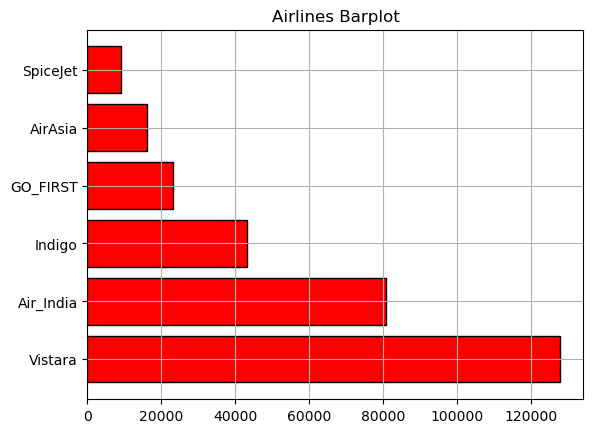

In [8]:
# there is 6 different airlines are making service.most of the travellers have opted for the Vistara airline (47%)
# with the help of a pie plot and barplot let us understand how much percent of the travellers opted specific airlines 
labels = df["airline"].value_counts().index
values = df["airline"].value_counts().values
plt.title("Airlines Barplot")
plt.barh(labels,values,color="r",edgecolor="k")
plt.grid(True)
plt.show()

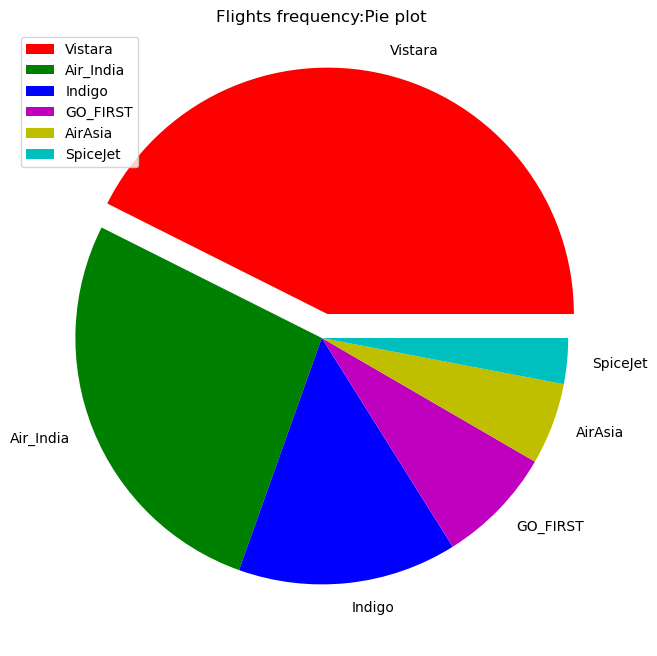

In [9]:
plt.figure(figsize=(10,8))
plt.title("Flights frequency:Pie plot")
values = df["airline"].value_counts().values
percent_airlines = values/len(df)
e = [0.1,0,0,0,0,0]
plt.pie(percent_airlines,explode=e,colors=["r","g","b","m","y","c"],labels=labels,startangle=0)
plt.legend(loc="upper left")
plt.show()

In [10]:
df['flight'].nunique()
# There is 1561 flights of different companies let us understand the flights of each company. and how many flights are there for each comapny

1561

In [11]:
categories_airlines = df['airline'].value_counts().index
no_flights = []
for x in categories_airlines:
    no_flights.append(df["flight"][df["airline"] == x].nunique())


In [12]:
for i in range(len(categories_airlines)):
    print("{} airlines: have {} no of flights".format(categories_airlines[i],no_flights[i]))

Vistara airlines: have 133 no of flights
Air_India airlines: have 218 no of flights
Indigo airlines: have 704 no of flights
GO_FIRST airlines: have 205 no of flights
AirAsia airlines: have 115 no of flights
SpiceJet airlines: have 186 no of flights


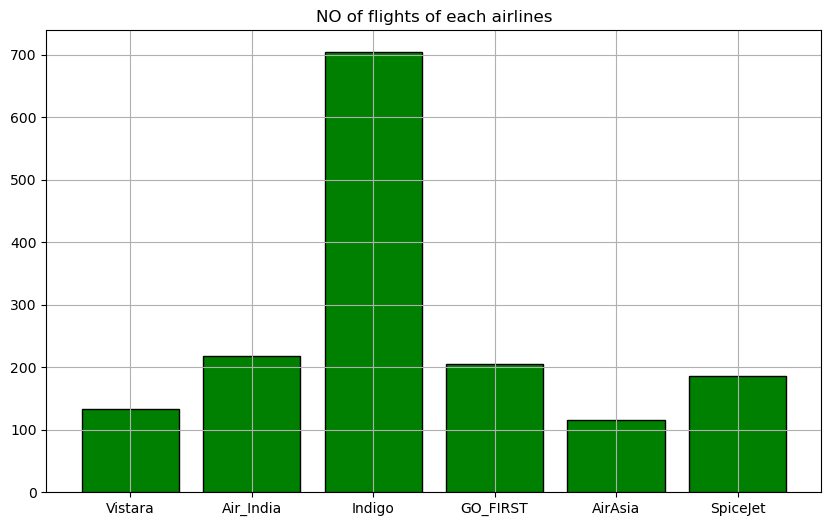

In [13]:
plt.figure(figsize=(10,6))
plt.title("NO of flights of each airlines")
plt.bar(categories_airlines,no_flights,color="g",edgecolor="k")
plt.grid(True)
plt.show()

* indigo has large no of flights count more than 700
* most of the passengers have travelled in Vistara airlnes. but the airline has 133 flights making service

In [14]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [15]:
df["source_city"].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [16]:
df["source_city"].nunique()

6

In [17]:
# there are 6 source city.Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'
# lets visualise the frequency of passengers from each city
no_passengers_each_city = []
for i in df['source_city'].value_counts().index:
    no_passengers_each_city.append(len(df['source_city'][df['source_city'] == i]))

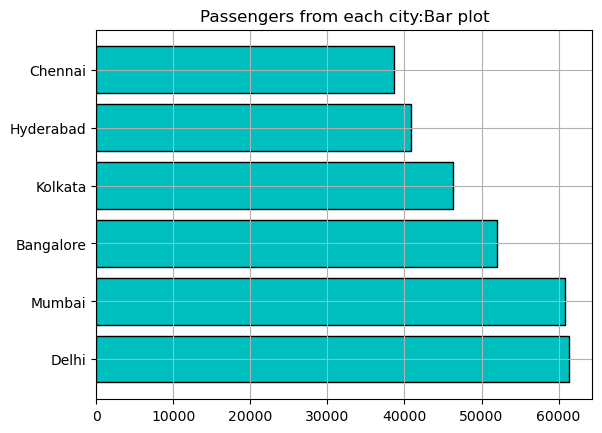

In [18]:
labels_passengers_each_city = df["source_city"].value_counts().index
plt.title("Passengers from each city:Bar plot")
plt.barh(labels_passengers_each_city,no_passengers_each_city,color="c",edgecolor="k")
plt.grid(True)
plt.show()

In [19]:
for i in range(len(labels_passengers_each_city)):
    print("{} City: No of passengers {}".format(labels_passengers_each_city[i],no_passengers_each_city[i]))

Delhi City: No of passengers 61343
Mumbai City: No of passengers 60896
Bangalore City: No of passengers 52061
Kolkata City: No of passengers 46347
Hyderabad City: No of passengers 40806
Chennai City: No of passengers 38700


In [20]:
# majority of the pasengers source point is Delhi or Mumbai

In [21]:
df["destination_city"].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

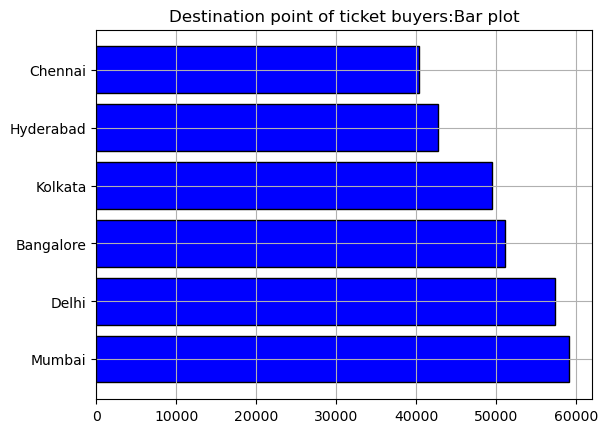

In [22]:
plt.title("Destination point of ticket buyers:Bar plot")
plt.grid(True)
plt.barh(df['destination_city'].value_counts().index,df["destination_city"].value_counts().values,color="b",edgecolor="k")
plt.show()

In [23]:
# so,the destination point of ticket buyers are mostly mumbai and delhi.
# Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

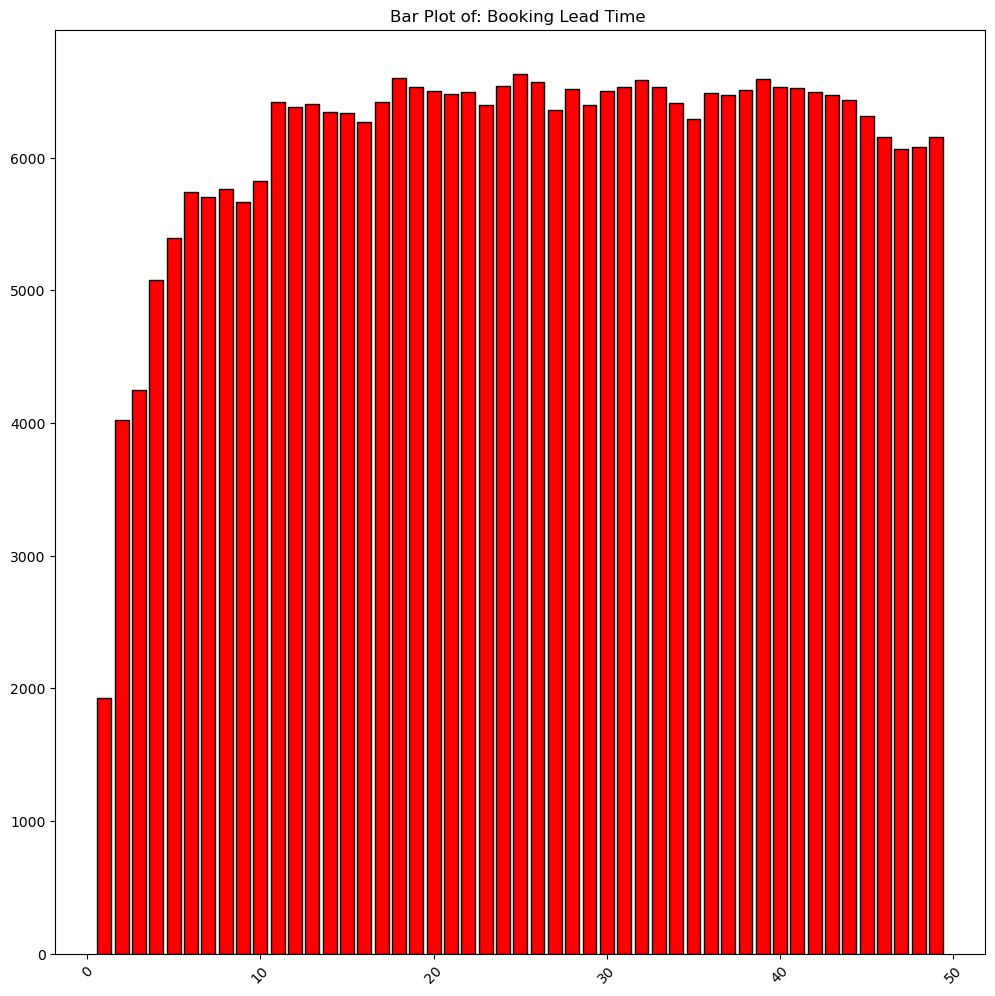

In [24]:
x = df["days_left"].value_counts().index
y = df["days_left"].value_counts().values
plt.figure(figsize=(12,12))
plt.title("Bar Plot of: Booking Lead Time ")
plt.bar(x,y,color="r",edgecolor="k")
plt.xticks(rotation=45)
plt.show()

* Very few amount of people book tickets 1 or 2 days before the travel.
* Now will check the relation between the price and Booking Lead time

In [25]:
df["price"].corr(df['days_left']) # negative corealation

-0.0919485321714385

In [26]:
# Lets find since,majority of the the travellers are booking ticket from mumbai and delhi 
mumbai_des_df = df[df["source_city"] == "Mumbai"]
mumbai_des_df['destination_city'].value_counts()

Delhi        14809
Bangalore    12885
Kolkata      12602
Hyderabad    10470
Chennai      10130
Name: destination_city, dtype: int64

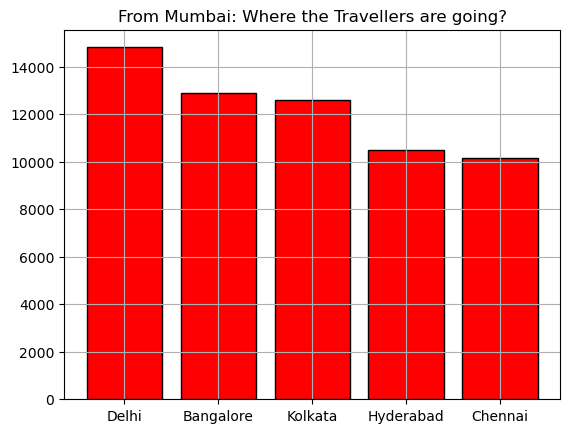

In [27]:
plt.title("From Mumbai: Where the Travellers are going?")
plt.bar(mumbai_des_df['destination_city'].value_counts().index,mumbai_des_df['destination_city'].value_counts().values,color="r",edgecolor="k")
plt.grid(True)
plt.show()

In [28]:
# majority of the mumbai travellers are going to delhi

In [29]:
price_vwtf = []
for i in range(1,50):
    price_vwtf.append(df.loc[(df["source_city"] == "Mumbai") & (df["destination_city"] == "Delhi") & (df["days_left"] == i), ["price"]].median())

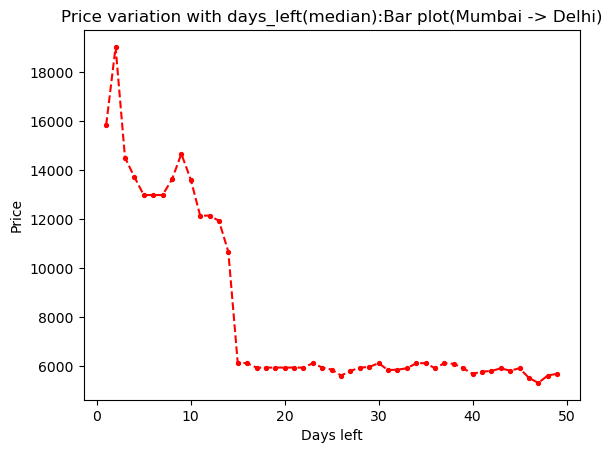

In [30]:
plt.title("Price variation with days_left(median):Bar plot(Mumbai -> Delhi)")
plt.plot(np.arange(1,50),price_vwtf,marker="o",linestyle="--",markersize=2.8,color="r")
plt.ylabel("Price")
plt.xlabel("Days left")
plt.show()

* it is very clear from the plot graph that, cost of the ticket just few days before the trip date is very high it become stable after 15 days
* b) How is the price affected when tickets are bought in just 1 or 2 days before departure?
* ANS:YES

In [31]:
# Price Variation with Airlines 
# lets check the variation of price with airlines for the route mumbai to delh.since it is the most frequent travel
c_airlines = list(df["airline"].unique())
cost_airlines = []
for x in c_airlines:
    cost_airlines.append(df.loc[(df["source_city"] == "Mumbai") & (df["destination_city"] == "Delhi") &(df["class"] == "Economy") & (df["airline"] == x),["price"]].median())

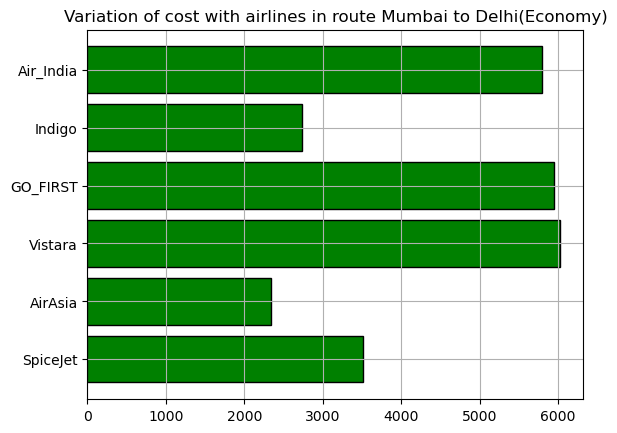

In [32]:
cost_airlines = [3512,2336,6022,5942,2738,5798]
plt.title("Variation of cost with airlines in route Mumbai to Delhi(Economy)")
plt.barh(c_airlines,cost_airlines,color="g",edgecolor="k")
plt.grid(True)
plt.show()

* Vistara,airindia,Gofirst is the costies airline.with condition like class economy,s:Mumbai d:Delhi
* a) Does price vary with Airlines? YES

In [33]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [34]:
df["class"].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

In [35]:
# Lets find,which flights are making service mostly for Business class
df["airline"][df["class"] == "Business"].value_counts()

Vistara      60589
Air_India    32898
Name: airline, dtype: int64

In [36]:
df["airline"][df["class"] == "Economy"].value_counts()

Vistara      67270
Air_India    47994
Indigo       43120
GO_FIRST     23173
AirAsia      16098
SpiceJet      9011
Name: airline, dtype: int64

In [37]:
df["stops"].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [38]:
# if there is 2 or more stopping point where is the route
df["stops"].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

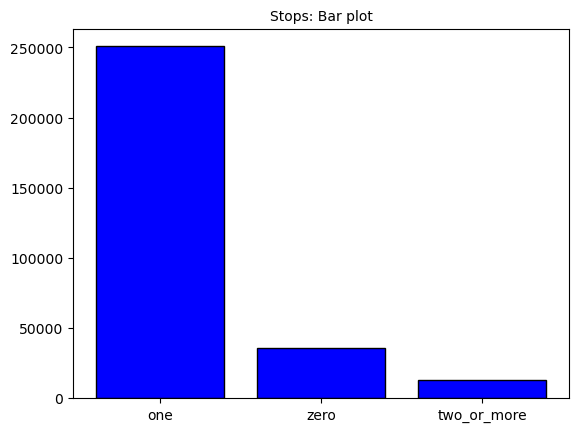

In [39]:
plt.title("Stops: Bar plot",size=10)
plt.bar(df["stops"].value_counts().index,df["stops"].value_counts().values,color="b",edgecolor="k")
plt.show()

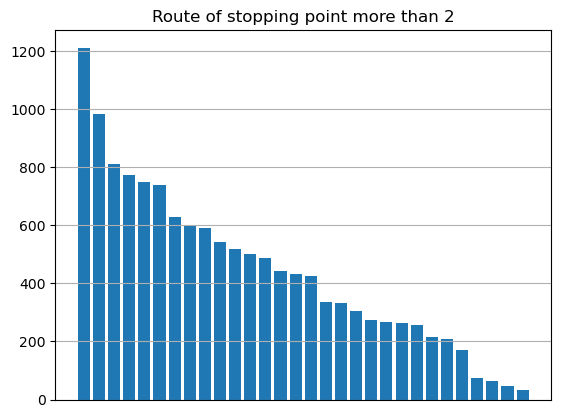

In [40]:
# Most of the journey offers one stop.
x = list(df[["source_city","destination_city"]][df["stops"] == "two_or_more"].value_counts().index)
y = list(df[["source_city","destination_city"]][df["stops"] == "two_or_more"].value_counts().values)
plt.title("Route of stopping point more than 2")
plt.bar(np.arange(1,len(y)+1),y)
plt.xticks([])
plt.grid(True)
plt.show()

In [41]:
df[["source_city","destination_city"]][df["stops"] == "two_or_more"].value_counts()

source_city  destination_city
Delhi        Chennai             1213
             Kolkata              984
Kolkata      Bangalore            813
Bangalore    Kolkata              774
Mumbai       Kolkata              748
             Chennai              739
Kolkata      Mumbai               630
Chennai      Bangalore            599
             Hyderabad            591
Kolkata      Hyderabad            543
             Chennai              518
Bangalore    Chennai              503
Delhi        Bangalore            486
Mumbai       Bangalore            444
Hyderabad    Kolkata              433
Bangalore    Hyderabad            425
Mumbai       Hyderabad            335
Hyderabad    Bangalore            332
             Mumbai               305
Bangalore    Mumbai               275
Hyderabad    Chennai              266
Kolkata      Delhi                263
Chennai      Kolkata              256
Bangalore    Delhi                216
Chennai      Delhi                209
Delhi        Hyderab

In [42]:
# Delhi -> chennai , is the route with stopping point more than 2 mostly
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [43]:
df["duration"].corr(df['price'])

0.20422236784542702

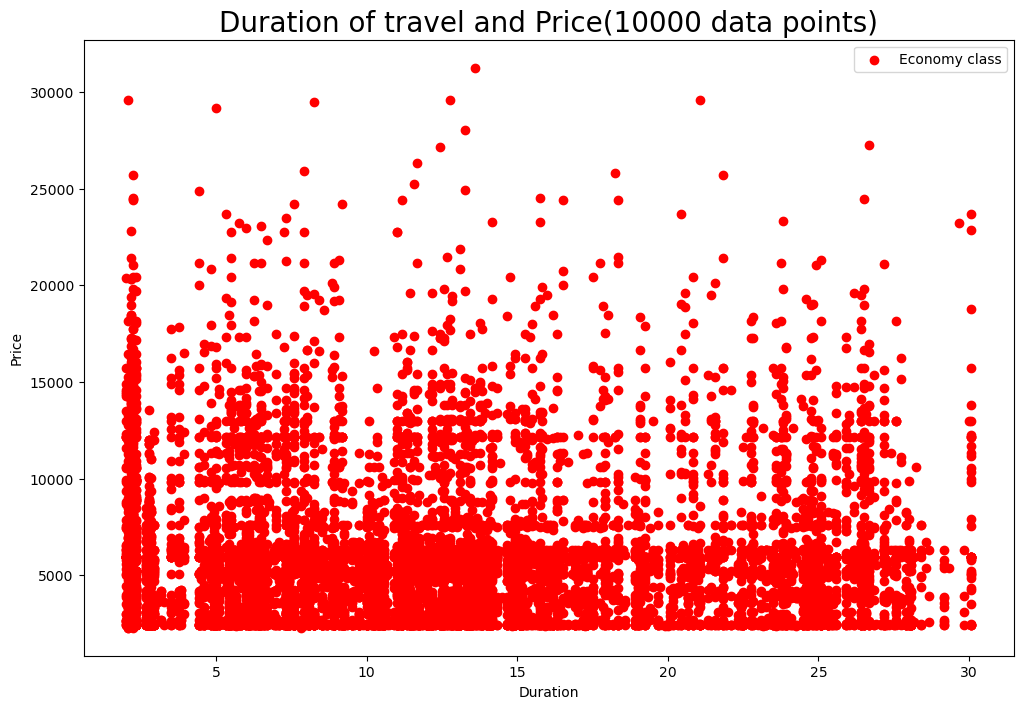

In [44]:
plt.figure(figsize=(12,8))
plt.title("Duration of travel and Price(10000 data points)",size=20)
plt.ylabel("Price")
plt.xlabel("Duration")
#plt.scatter(df["duration"][df["class"] == "Business"][:10000],df["price"][df["class"] == "Business"][:10000],color="k",label="Business class")
plt.scatter(df["duration"][df["class"] == "Business"][:10000],df["price"][df["class"] == "Economy"][:10000],color="r",label="Economy class")
plt.legend()
plt.show()

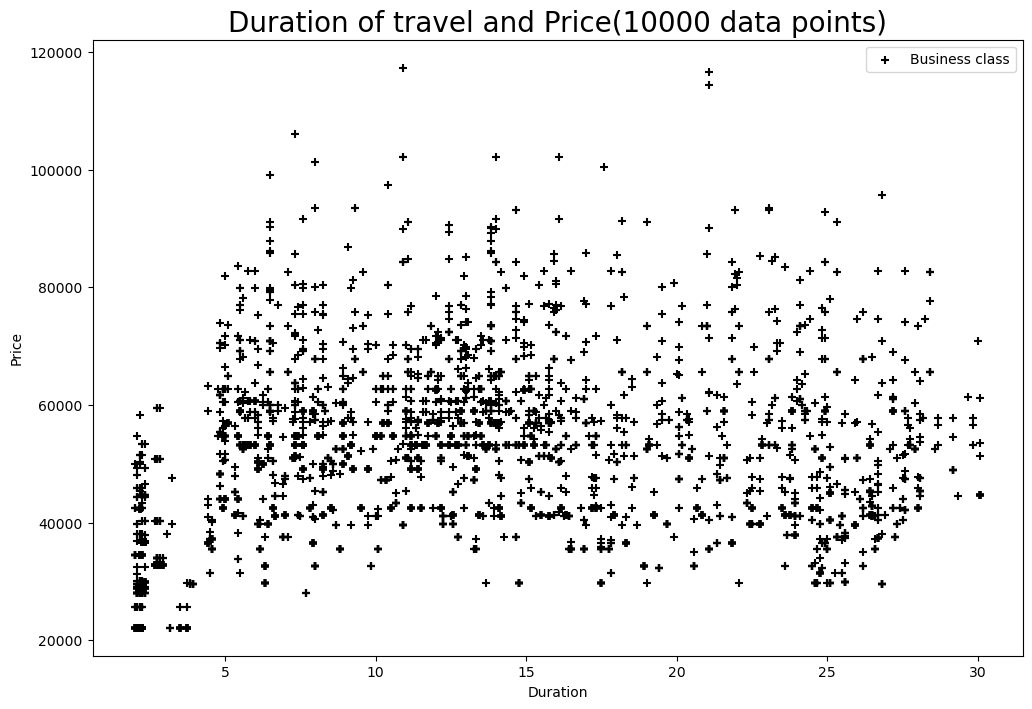

In [45]:
plt.figure(figsize=(12,8))
plt.title("Duration of travel and Price(10000 data points)",size=20)
plt.ylabel("Price")
plt.xlabel("Duration")
plt.scatter(df["duration"][df["class"] == "Business"][:10000],df["price"][df["class"] == "Business"][:10000],color="k",label="Business class",marker="+")
#plt.scatter(df["duration"][df["class"] == "Business"][:10000],df["price"][df["class"] == "Economy"][:10000],color="r",label="Economy class")
plt.legend()
plt.show()

In [46]:
df['class'].map({"Economy":1,"Business":2}).corr(df["price"])

0.9378603239059

* class of travel and the price are the highly corelated features.for predicting the price best feature is class of travel

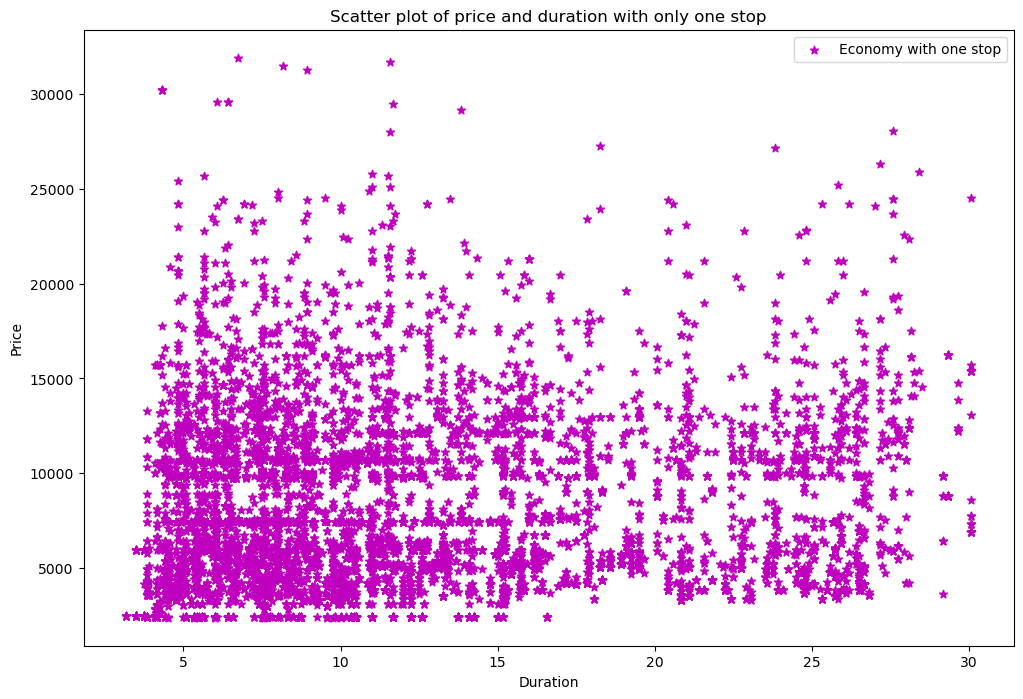

In [47]:
plt.figure(figsize=(12,8))
plt.title("Scatter plot of price and duration with only one stop")
plt.scatter(df.loc[(df['class'] == "Economy") & (df['stops'] == "one") ,["duration"]][:10000],df.loc[(df['class'] == "Economy") & (df['stops'] == "one") ,["price"]][:10000],color="m",marker="*",label="Economy with one stop")
plt.xlabel("Duration")
plt.legend()
plt.ylabel("Price")
plt.show()

In [48]:
# corelation between the stop feature and target feature
df["stops"].map({"zero":0,"one":1,"two_or_more":2}).corr(df["price"])

0.11964847072414028

In [49]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [53]:
map_ = {}
i = 1
for x in df["departure_time"].unique():
    map_[x] = i
    i += 1
map_

{'Evening': 1,
 'Early_Morning': 2,
 'Morning': 3,
 'Afternoon': 4,
 'Night': 5,
 'Late_Night': 6}

In [54]:
df["departure_time"].map(map_).corr(df["price"])

0.002522302095862021

In [56]:
encode_arrival_time = {}
i = 1
for x in df["arrival_time"].unique():
    encode_arrival_time[x] = i
    i += 1
encode_arrival_time

{'Night': 1,
 'Morning': 2,
 'Early_Morning': 3,
 'Afternoon': 4,
 'Evening': 5,
 'Late_Night': 6}

In [61]:
df["arrival_time"].map(encode_arrival_time).corr(df["price"])

-0.03117608539476416